# Car price prediction with machine learning

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

C:\Users\Ankit Malviya\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\Ankit Malviya\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Ankit Malviya\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavi

## 1. Load data 

In [2]:
df=pd.read_csv("CarPrice.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 2. Checking missing values

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## 3. Data Standardization

In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df["citympg"]=235/df["citympg"]
df.rename(columns={'citympg':'city_L/100Km'},inplace=True)

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,city_L/100Km,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,22,17450.0


In [10]:
df["highwaympg"]=235/df["highwaympg"]
df.rename(columns={'highwaympg':'highway_L/100Km'},inplace=True)

In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,city_L/100Km,highway_L/100Km,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,9.038462,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,7.833333,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,10.681818,17450.0


## 4. Data Normalization

In [12]:
df['carlength']=df['carlength']/df['carlength'].max()

In [13]:
df['carwidth']=df['carwidth']/df['carwidth'].max()

In [14]:
df['carheight']=df['carheight']/df['carheight'].max()

In [15]:
df[["carlength","carwidth","carheight"]].head()

,carlength,carwidth,carheight
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


In [16]:
dummy_variables_1=pd.get_dummies(df['fueltype'])
dummy_variables_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
dummy_variables_1.rename(columns={'diesel':'fuel-type-diesel','gas':'fuel-type-gas'},inplace=True)

In [18]:
dummy_variables_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [19]:
df=pd.concat([df,dummy_variables_1],axis=1)

In [20]:
df.drop('fueltype',axis=1,inplace=True)

In [21]:
dummy_variables_2=pd.get_dummies(df['aspiration'])
dummy_variables_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)


In [22]:
df=pd.concat([df,dummy_variables_2],axis=1)
df.drop('aspiration',axis=1,inplace=True)

In [23]:
df.head()

,car_ID,symboling,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,city_L/100Km,highway_L/100Km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,1,3,alfa-romero giulia,two,convertible,rwd,front,88.6,0.811148,0.886584,...,9.0,111,5000,11.190476,8.703704,13495.0,0,1,1,0
1,2,3,alfa-romero stelvio,two,convertible,rwd,front,88.6,0.811148,0.886584,...,9.0,111,5000,11.190476,8.703704,16500.0,0,1,1,0
2,3,1,alfa-romero Quadrifoglio,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,9.0,154,5000,12.368421,9.038462,16500.0,0,1,1,0
3,4,2,audi 100 ls,four,sedan,fwd,front,99.8,0.848630,0.915629,...,10.0,102,5500,9.791667,7.833333,13950.0,0,1,1,0
4,5,2,audi 100ls,four,sedan,4wd,front,99.4,0.848630,0.918396,...,8.0,115,5500,13.055556,10.681818,17450.0,0,1,1,0


In [24]:
df.to_csv('clean_car.csv')

## 5. Data analysis

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city_L/100Km,highway_L/100Km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,-0.092012,-0.072955,-0.109093,0.125568,-0.125568,-0.067729,0.067729
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,0.063165,-0.030190,-0.079978,-0.194311,0.194311,0.059866,-0.059866
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.474040,0.578128,0.577816,0.308346,-0.308346,-0.257611,0.257611
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.659165,0.711597,0.682920,0.212679,-0.212679,-0.234539,0.234539
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.682850,0.728044,0.759325,0.233880,-0.233880,-0.300567,0.300567
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.002333,0.085892,0.119336,0.284631,-0.284631,-0.087311,0.087311
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.791911,0.836742,0.835305,0.217275,-0.217275,-0.324902,0.324902
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.744952,0.777077,0.874145,0.069594,-0.069594,-0.108217,0.108217
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.555989,0.551965,0.553173,0.054451,-0.054451,-0.212614,0.212614
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.042508,0.055402,0.079443,0.241829,-0.241829,-0.222982,0.222982


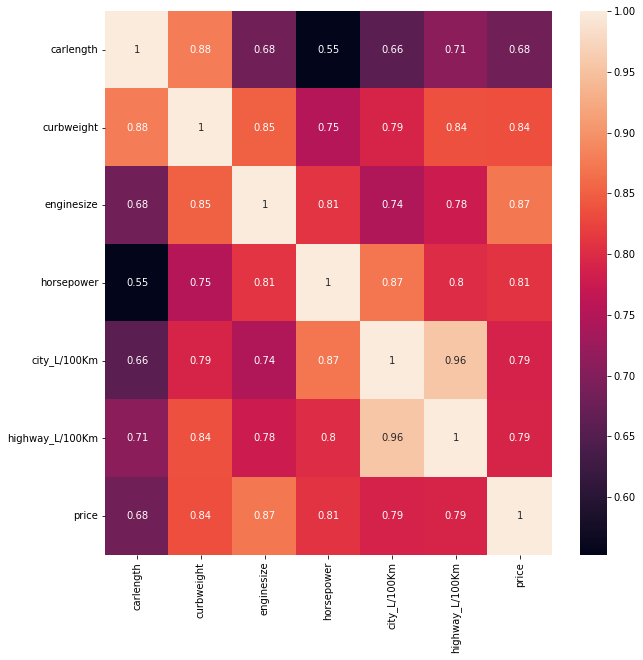

In [27]:
relation=df[['carlength','curbweight','enginesize','horsepower','city_L/100Km','highway_L/100Km','price']].corr()
plt.subplots(figsize=(10,10))
sns.heatmap(relation,annot=True)


## 6. Analyzing Individual Feature Patterns Using Visualization
##  Exploratory Data Analysis

(0, 47755.67423733229)

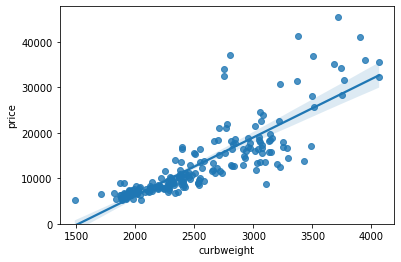

In [28]:
sns.regplot(x="curbweight",y="price",data=df)
plt.ylim(0,)

(0, 53297.225720902454)

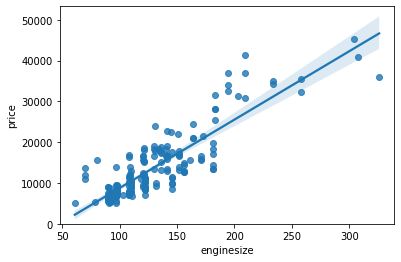

In [29]:
sns.regplot(x="enginesize",y="price",data=df)
plt.ylim(0,)

(0, 50806.07382379599)

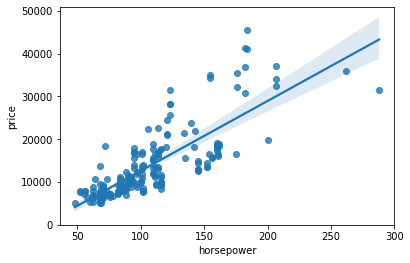

In [30]:
sns.regplot(x="horsepower",y="price",data=df)
plt.ylim(0,)

(0, 47718.56301467478)

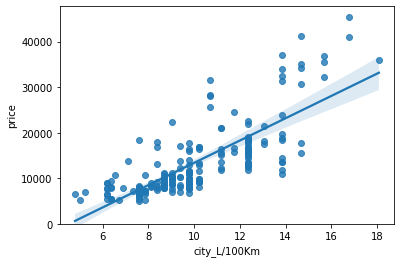

In [31]:
sns.regplot(x="city_L/100Km",y="price",data=df)
plt.ylim(0,)

(0, 47698.04194541096)

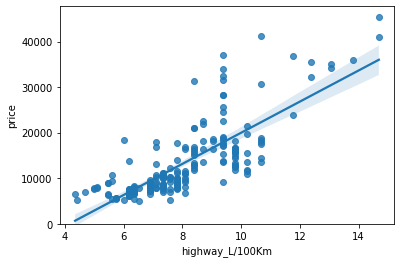

In [32]:
sns.regplot(x="highway_L/100Km",y="price",data=df)
plt.ylim(0,)

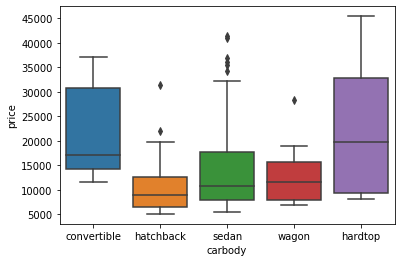

In [33]:
sns.boxplot(x="carbody",y="price",data=df)

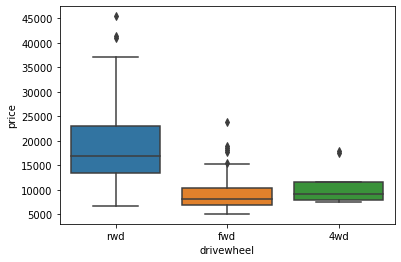

In [34]:
sns.boxplot(x="drivewheel",y="price",data=df)

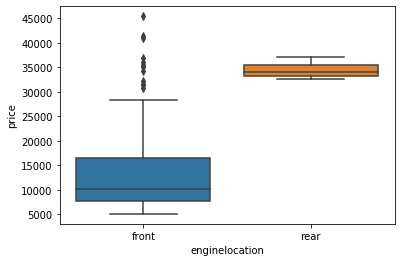

In [35]:
sns.boxplot(x="enginelocation",y="price",data=df)

In [36]:
df["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

## 7. Model Development 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### Linear regression 

In [38]:
x=df[['highway_L/100Km']]
y=df['price']
lm = LinearRegression()
lm.fit(x,y)
lm.score(x, y)

0.6257503537374551

In [39]:
yhat=lm.predict(x)
yhat[0:4]

array([15563.47592922, 15563.47592922, 16707.13094093, 12589.97289877])

In [40]:
x=df[['curbweight']]
y=df['price']
lm1 = LinearRegression()
lm1.fit(x,y)
lm1.score(x, y)

0.6977342414446954

In [41]:
yhat=lm1.predict(x)
yhat[0:4]

array([13179.74528473, 13179.74528473, 16704.19273681, 10475.53287605])

In [42]:
x=df[['enginesize']]
y=df['price']
lm2 = LinearRegression()
lm2.fit(x,y)
lm2.score(x, y)

0.7641291357806177

In [43]:
yhat=lm2.predict(x)
yhat[0:4]

array([13795.34859997, 13795.34859997, 17484.71376062, 10273.68185571])

In [44]:
x=df[['horsepower']]
y=df['price']
lm3 = LinearRegression()
lm3.fit(x,y)
lm3.score(x, y)

0.653088356490231

In [64]:
y_data = df['price']

x_data=df.drop('price',axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

lre=LinearRegression()

lre.fit(x_train[['enginesize']], y_train)
lre.score(x_test[['enginesize']], y_test)

number of test samples : 82
number of training samples: 123


0.7838877167904686

In [65]:
lre.score(x_train[['enginesize']], y_train)

0.7502708839881271

According to simple linear regression model we analysed that from four variable (horsepower, curb weight, engine-size, highway-L/100km) variable "engine size" is more predictable.

### Multiple linear regression 

In [48]:
Z = df[['horsepower', 'curbweight', 'enginesize', 'highway_L/100Km']]

In [49]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lm.score(Z,df['price'])

0.8157878181473879

### pipline 

In [66]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [67]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [68]:
pipe.fit(Z,df['price'])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [69]:
pipe.score(Z,df['price'])

0.8499791300341109

## 8.  Model Evaluation and Refinement

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [122]:
Z = df[['horsepower', 'curbweight', 'enginesize', 'highway_L/100Km']]   

Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.5, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 103
number of training samples: 102


In [123]:
from sklearn.linear_model import Ridge

In [124]:
pr=PolynomialFeatures(degree=2)

In [125]:
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curbweight', 'enginesize', 'highway_L/100Km']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curbweight', 'enginesize', 'highway_L/100Km']])

In [126]:
RidgeModel=Ridge(alpha=0.1)

RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [127]:
RidgeModel.score(x_train_pr, y_train)

0.8963746564010757

In [128]:
RidgeModel.score(x_test_pr, y_test)

0.7728828856020865

In [129]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|███| 1000/1000 [00:11<00:00, 89.69it/s, Test Score=0.79, Train Score=0.87]


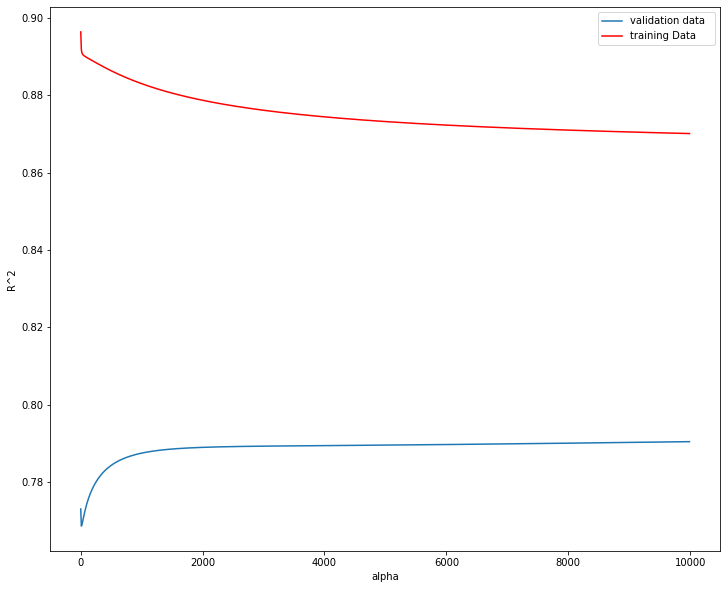

In [130]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()